In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/song9063/Wiset2025Examples/refs/heads/main/datasets/titanic.csv')

In [14]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [ ]:
df['Family'] = df['SibSp'] + df['Parch']
df.info()

In [16]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# df.info()

<ipython-input-16-3deda451eb80>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-16-3deda451eb80>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,0


In [19]:
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

In [27]:
# X.shape # Input 7

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [23]:
# Scale
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [35]:
model = Sequential()

model.add( Dense(7, activation='relu') )

model.add( Dense(7, activation='relu') )
model.add( Dense(7, activation='relu') )

model.add( Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [36]:
model.fit(
    x=X_train, y=y_train,
    validation_data=(X_test, y_test),
    epochs=500
)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6521 - val_loss: 0.6215
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6122 - val_loss: 0.5973
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5995 - val_loss: 0.5770
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5911 - val_loss: 0.5527
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5503 - val_loss: 0.5205
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5022 - val_loss: 0.4871
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5026 - val_loss: 0.4628
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4866 - val_loss: 0.4488
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4782 - val_loss: 0.4391
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4826 - val_loss: 0.4317
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4642 - val_loss: 0.4283
Epoch 12/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

<Axes: >

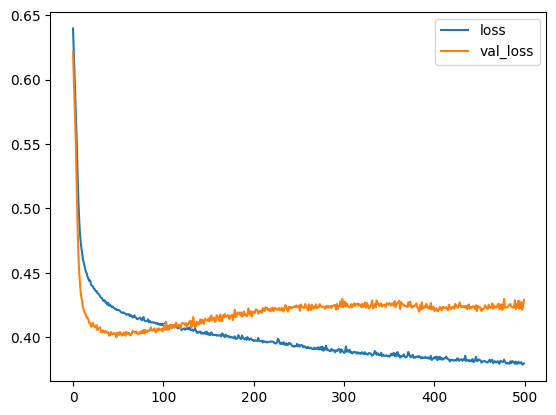

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [38]:
model = Sequential()

model.add( Dense(7, activation='relu') )

model.add( Dense(7, activation='relu') )
model.add( Dense(7, activation='relu') )

model.add( Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
e_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=25
)

In [41]:
model.fit(
    x=X_train, y=y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    callbacks=[e_stop]
)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.6928 - val_loss: 0.6764
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6722 - val_loss: 0.6577
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6570 - val_loss: 0.6420
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6353 - val_loss: 0.6247
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6330 - val_loss: 0.6030
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6005 - val_loss: 0.5735
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5799 - val_loss: 0.5490
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5534 - val_loss: 0.5248
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5455 - val_loss: 0.5022
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5121 - val_loss: 0.4776
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5052 - val_loss: 0.4613
Epoch 12/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

<Axes: >

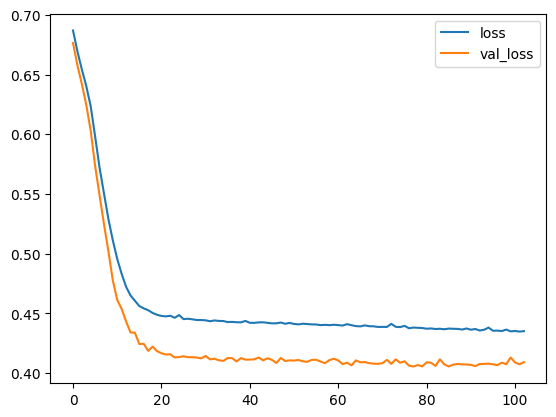

In [42]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [44]:
model = Sequential()

model.add( Dense(7, activation='relu') )
model.add( Dropout(0.3) )

model.add( Dense(7, activation='relu') )
model.add( Dropout(0.3) )

model.add( Dense(7, activation='relu') )

model.add( Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [45]:
model.fit(
    x=X_train, y=y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    callbacks=[e_stop]
)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7054 - val_loss: 0.6905
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6859 - val_loss: 0.6772
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6786 - val_loss: 0.6646
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6700 - val_loss: 0.6546
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6658 - val_loss: 0.6449
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6587 - val_loss: 0.6359
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6479 - val_loss: 0.6253
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6394 - val_loss: 0.6153
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6220 - val_loss: 0.6029
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6218 - val_loss: 0.5886
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6190 - val_loss: 0.5741
Epoch 12/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

<Axes: >

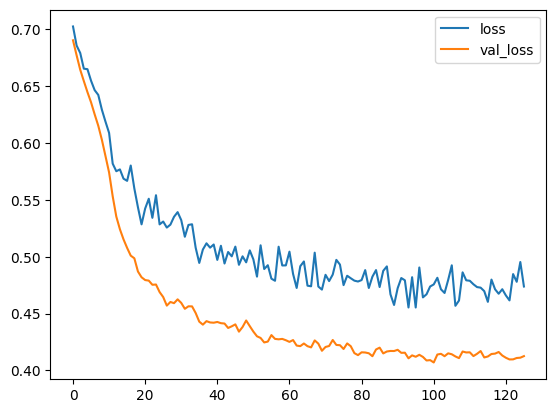

In [46]:
losses = pd.DataFrame(model.history.history)
losses.plot()